<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Collecting Job Data Using APIs**


## Objectives


*   Collect job data from Jobs API
*   Store the collected data into an excel spreadsheet.


#### Instructions


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: [https://www.kaggle.com/promptcloud/jobs-on-naukricom](https://www.kaggle.com/promptcloud/jobs-on-naukricom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01) under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

*   Los Angeles
*   New York
*   San Francisco
*   Washington DC
*   Seattle
*   Austin
*   Detroit


In [8]:
#Import required libraries
import requests
import pandas as pd
import json

#### Write a function to get the number of jobs for the Python technology.<br>

> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.

Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01">link</a>

##### The keys in the json are

*   Job Title

*   Job Experience Required

*   Key Skills

*   Role Category

*   Location

*   Functional Area

*   Industry

*   Role

You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01">json</a> URL.


In [3]:
api_url="http://127.0.0.1:5000/data"

def get_number_of_jobs_T(technology):
    
    number_of_jobs = 0
    payload = {"Key Skills":technology}
    response = requests.get(api_url,params=payload)
    
    if response.ok :
        data = response.json()
        number_of_jobs = len(data)
    
    return technology,number_of_jobs


Calling the function for Python and checking if it works.


In [32]:
get_number_of_jobs_T("Python")

('Python', 1173)

#### Write a function to find number of jobs in US for a location of your choice


In [38]:
def get_number_of_jobs_L(location):
    
    number_of_jobs = 0
    payload = {"Location":location}
    response = requests.get(api_url,params=payload)
    
    if response.ok :
        data = response.json()
        number_of_jobs = len(data)
        

    return location,number_of_jobs

Call the function for Los Angeles and check if it is working.


In [47]:
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


Create a python list of all locations for which you need to find the number of jobs postings.


In [51]:
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

Import libraries required to create excel spreadsheet


In [52]:
from openpyxl import Workbook

Create a workbook and select the active worksheet


In [66]:
wb=Workbook()
ws=wb.active  

Find the number of jobs postings for each of the location in the above list.
Write the Location name and the number of jobs postings into the excel spreadsheet.


In [69]:
loc_jobs = []
for loc in locations :
    jobs = get_number_of_jobs_L(loc)
    loc_jobs.append(jobs)
    
ws.append(['Location','Number of jobs posting'])
for i in loc_jobs :
    ws.append(i)

Save into an excel spreadsheet named 'job-postings.xlsx'.


In [72]:
wb.save("job-postings.xlsx")

df = pd.read_excel("job-postings.xlsx")
print(df)

        Location  Number of jobs posting
0    Los Angeles                     640
1       New York                    3226
2  San Francisco                     435
3  Washington DC                    5316
4        Seattle                    3375
5         Austin                     434
6        Detroit                    3945


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [11]:
Languages = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]

from openpyxl import Workbook

wb1=Workbook()
ws1=wb1.active  


tech_jobs = []
for lan in Languages :
    jobs = get_number_of_jobs_T(lan)
    tech_jobs.append(jobs)
ws1.append(['Language','Number of jobs posting'])
for i in tech_jobs :
    ws1.append(i)

wb1.save("job-postings-tech.xlsx")
df = pd.read_excel("job-postings-tech.xlsx")
df

,Language,Number of jobs posting
0,C,13498
1,C#,333
2,C++,305
3,Java,2609
4,JavaScript,355
5,Python,1173
6,Scala,33
7,Oracle,784
8,SQL Server,250
9,MySQL Server,0


<AxesSubplot:ylabel='Language'>

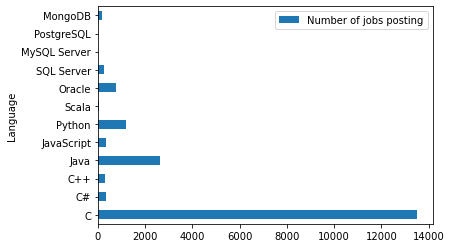

In [13]:
df.plot.barh(x="Language", y="Number of jobs posting")

## Author


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © 2022 IBM Corporation. All rights reserved.
